In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
y = data['Price']
X = data.drop('Price', axis=1)

In [ ]:
y.shape, X.shape

((20640,), (20640, 8))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


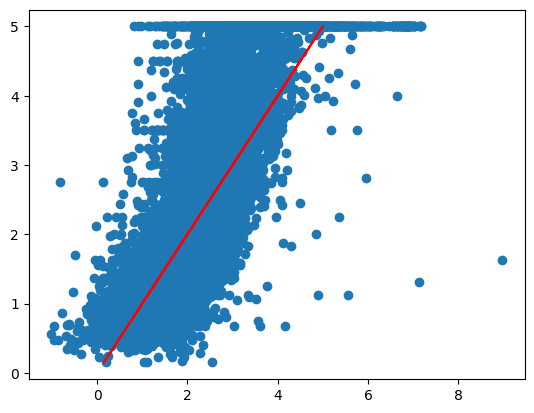

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [ ]:
model.score(X, y)

0.606232685199805

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

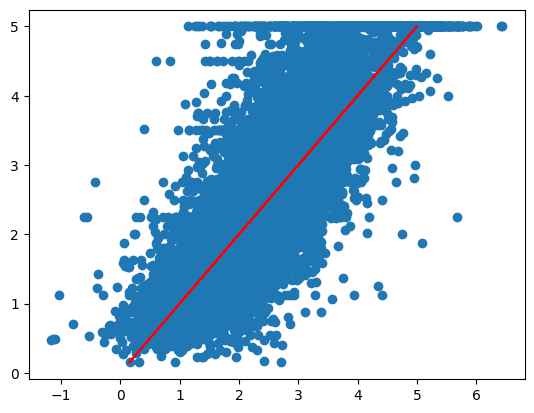

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.7286583857949847

## Задания для самостоятельного выполнения

Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X) # При увеличении степени полинома ухуджается результат

polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

polynomial.score(poly, y)

print("\nОценка модели с полиномом 5-й степени:")
print(f"R² (коэффициент детерминации): {polynomial.score(poly, y):.4f}")

mae = mean_absolute_error(y, y_pred_poly)
mse = mean_squared_error(y, y_pred_poly)
r2 = r2_score(y, y_pred_poly)

print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (Среднеквадратичная ошибка): {mse:.4f}")


Оценка модели с полиномом 5-й степени:
R² (коэффициент детерминации): 0.7287
MAE (Средняя абсолютная ошибка): 0.4284
MSE (Среднеквадратичная ошибка): 0.3613


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X) # При увеличении степени полинома ухуджается результат

polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

polynomial.score(poly, y)

print("\nОценка модели с полиномом 5-й степени:")
print(f"R² (коэффициент детерминации): {polynomial.score(poly, y):.4f}")

mae = mean_absolute_error(y, y_pred_poly)
mse = mean_squared_error(y, y_pred_poly)
r2 = r2_score(y, y_pred_poly)

print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (Среднеквадратичная ошибка): {mse:.4f}")


Оценка модели с полиномом 5-й степени:
R² (коэффициент детерминации): 0.3663
MAE (Средняя абсолютная ошибка): 0.6903
MSE (Среднеквадратичная ошибка): 0.8438
